# Projet HR Analytics

Pour ce projet nous allons travailler sur le data set Human Ressources que vous pouvez retrouver ici : <a href=https://www.kaggle.com/datasets/rhuebner/human-resources-data-set>HR Analytics Dataset</a>.
 Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.
 Ce jeux de données est composé de 311 lignes et 36 colonnes. Voici à quoi correspondent chaque colonnes.
 
 ![image](https://github.com/user-attachments/assets/1229229c-b289-46c4-844e-a3993e232b32)

## Objectif du projet
Étudier les distributions des scores de performance et des heures travaillées pour détecter les facteurs d'amélioration.
L’objectif était de répondre à une problématique métier concrète :> **Fournir à l’entreprise un rapport automatisé sur les données RH pour permettre de voir facilement les évolutions des scores de performances**
.

## Compétences mises en avant
Pendant ce projet j'ai du mettre à l'épreuve mes connaissances dans les compétences ci-dessous :
   - Statistiques descriptives : Moyenne, médiane, mode, quartiles, variance, écart-type.
   - Visualisation des distributions : Histogrammes, boxplots, pie chart, diagramme en barre.
   - Détection et analyse des outliers avec la règle des 1.5 * IQR.
   -  Manipulation des données avec Python

## Etapes du projet :

- Importer les librairies nécessaires au projet (pandas et matplotlib).
- Importer le jeu de données HR_Dataset_v14.csv.
- Description du dataframe obtenue, création de nouvelles variables comme le nombre d'années au sein de l'entreprise et changement de type de données si nécessaires.
- Statistiques descriptives (indicateurs de position et indicateurs de dipersion).
- Visualisation des distributions.
-  Détection et analyse des outliers avec la règle des 1.5 * IQ
-  Conclusion
-  Exportation des jeux de données utiles pour la création du dashboard avec Power BI.

### Importation des librairies

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import spearmanr

Maintenant que nous avons importé les librairies pour réaliser ce projet, on va importer le jeu de données HR_Dataset_v14.csv.

### Importation du jeu de données

In [168]:
df = pd.read_csv('HRDataset_v14.csv', sep = ',') # Permet de lire le fichier au format csv.
pd.set_option('display.max_columns', None) # Cette fonction permet d'afficher toutes les colonnes d'un jeu de données.
df.head(10) # Permet d'afficher les 10 premières lignes du jeux de données pour se faire une idée ce qui le compose.

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


Maintenant que nous avons tout le dataset de visible nous allons pouvoir décrire rapidement le jeu de données que nous avons.

### Description du dataframe

Dans cette partie nous allons extraire les premieres variables qui nous semblent essentielles au projet, puis nous allons en créer trois nouvelles qui correspondront à l'ancienneté sous trois formes. Ensuite nous regarderons si toutes les colonnes sont du bon types et nous les changerons si nécessaires.

In [170]:
df.shape # Permet d'afficher une matrice (1,2) contenant le nombre de lignes et le nombre de colonnes.

(311, 36)

Notre jeu de données est composé de 311 lignes et 36 variables. Nous allons faire une copie du jeu de données et en extraire seulement les variables qui nous seront utiles pour la suite.

In [172]:
df_utile = df[['EmpID', 'MaritalStatusID', 'EmpStatusID',  'Salary', 'Sex', 'HispanicLatino', 'DateofHire', 'DateofTermination', 
                'Department', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 
                'DaysLateLast30', 'Absences', 'DOB', 'RecruitmentSource']].copy() # Avec cette ligne on extrait les variables qui nous intérressent directement de la copie.
# La fonction .copy() permet de créer une copie du jeu de données pour ne pas altérer l'original en cas d'erreur.
df_utile.head(10)

,EmpID,MaritalStatusID,EmpStatusID,Salary,Sex,HispanicLatino,DateofHire,DateofTermination,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB,RecruitmentSource
0,10026,0,1,62506,M,No,7/5/2011,NaN,Production,Exceeds,4.60,5,0,1/17/2019,0,1,07/10/83,LinkedIn
1,10084,1,5,104437,M,No,3/30/2015,6/16/2016,IT/IS,Fully Meets,4.96,3,6,2/24/2016,0,17,05/05/75,Indeed
2,10196,1,5,64955,F,No,7/5/2011,9/24/2012,Production,Fully Meets,3.02,3,0,5/15/2012,0,3,09/19/88,LinkedIn
3,10088,1,1,64991,F,No,1/7/2008,NaN,Production,Fully Meets,4.84,5,0,1/3/2019,0,15,09/27/88,Indeed
4,10069,2,5,50825,F,No,7/11/2011,9/6/2016,Production,Fully Meets,5.00,4,0,2/1/2016,0,2,09/08/89,Google Search
5,10002,0,1,57568,F,No,1/9/2012,NaN,Production,Exceeds,5.00,5,0,1/7/2019,0,15,05/22/77,LinkedIn
6,10194,0,1,95660,F,No,11/10/2014,NaN,Software Engineering,Fully Meets,3.04,3,4,1/2/2019,0,19,05/24/79,LinkedIn
7,10062,4,1,59365,M,No,9/30/2013,NaN,Production,Fully Meets,5.00,4,0,2/25/2019,0,19,02/18/83,Employee Referral
8,10114,0,3,47837,F,No,7/6/2009,NaN,Production,Fully Meets,4.46,3,0,1/25/2019,0,4,02/11/70,Diversity Job Fair
9,10250,2,1,50178,M,No,1/5/2015,NaN,IT/IS,Fully Meets,5.00,5,6,2/18/2019,0,16,01/07/88,Indeed


Nous avons sélectionné les variables qui nous paraissent les plus pertinentes à ce stade. Si d'autres variables s’avèrent nécessaires par la suite, nous pourrons les ajouter facilement. Avant de nous pencher sur le format des variables existantes, nous allons créer quatre nouvelles variables représentant le nombre d'années passées dans l'entreprise, le nombre de jours travaillés, le nombre d'heures travaillées estimées sur une base de 35 heures par semaines et l'age des employés. Celle-ci nous permettra d’analyser l’impact de l’ancienneté sur les performances des employés.

In [174]:
# Conversion au format datetime :
df_utile['DateofHire'] = pd.to_datetime(df_utile['DateofHire'], errors='coerce') # Le paramètre errors = 'coerce' permet de 
# modifier les valeurs manquantes en NaT (Not a Time)
df_utile['DOB'] = pd.to_datetime(df_utile['DOB'], errors='coerce')

# On commence par fixé la date actuelle :
reference_date = pd.Timestamp.now() # Permet d'actualiser la date à chaque utilisation

# Ancienneté en année :
df_utile['Année'] = (reference_date - df_utile['DateofHire']).dt.days // 365 # La commande .dt.days permet d'extraire le nombre de 
# jours entier entre deux dates

# Ancienneté en jours
df_utile['Anciennete_jours'] = (reference_date - df_utile['DateofHire']).dt.days

# Heures de travail estimées (35 heures par semaine)
df_utile['Heures_travaillees'] = (df_utile['Anciennete_jours'] / 7) * 35

# Visualisation des nouvelles variables :
df_utile.head(10)

# Création de la varible 'Age' :
df_utile['Age'] = (reference_date.year - df_utile['DOB'].dt.year)
df_utile[df_utile['Age'] < 0] # Vérification des anomalies

C:\Users\loris\AppData\Local\Temp\ipykernel_4052\3083823218.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_utile['DOB'] = pd.to_datetime(df_utile['DOB'], errors='coerce')


,EmpID,MaritalStatusID,EmpStatusID,Salary,Sex,HispanicLatino,DateofHire,DateofTermination,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB,RecruitmentSource,Année,Anciennete_jours,Heures_travaillees,Age
8,10114,0,3,47837,F,No,2009-07-06,NaN,Production,Fully Meets,4.46,3,0,1/25/2019,0,4,2070-02-11,Diversity Job Fair,15,5793,28965.0,-45
10,10252,1,5,54670,F,Yes,2011-01-10,1/12/2017,Production,Fully Meets,4.20,4,0,1/30/2016,0,12,2074-01-12,Diversity Job Fair,14,5240,26200.0,-49
11,10242,1,5,47211,M,Yes,2012-04-02,9/19/2016,Production,Fully Meets,4.20,3,0,5/6/2016,0,15,2074-02-21,Diversity Job Fair,13,4792,23960.0,-49
16,10023,1,2,70131,F,No,2016-07-21,NaN,Production,Exceeds,4.40,3,0,1/14/2019,0,16,2066-04-17,Employee Referral,8,3221,16105.0,-41
17,10055,0,1,59026,F,No,2011-04-04,NaN,Production,Fully Meets,5.00,5,0,1/14/2019,0,12,2070-10-27,Google Search,14,5156,25780.0,-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,10144,2,1,88976,M,No,2011-08-01,NaN,Production,Fully Meets,3.93,3,0,2/27/2019,0,19,2068-10-10,Employee Referral,13,5037,25185.0,-43
296,10274,1,5,80512,F,No,2011-09-26,1/2/2012,Production,Fully Meets,4.50,3,0,1/2/2012,0,5,2055-11-14,Diversity Job Fair,13,4981,24905.0,-30
301,10048,1,5,55140,M,No,2011-05-16,9/7/2015,Production,Fully Meets,5.00,3,0,2/15/2015,0,7,2065-09-09,Website,14,5114,25570.0,-40
303,10264,0,5,59728,F,Yes,2012-01-09,6/27/2015,Production,Fully Meets,4.30,4,0,6/2/2014,0,16,2069-10-02,Diversity Job Fair,13,4876,24380.0,-44


On observe donc 91 anomalies du à une ambiguité de format au niveau de l'année on va donc corrigé ca.

In [176]:
def corriger_date(date_str):
    try: # Teste la valeur
        date = pd.to_datetime(date_str, dayfirst = True, errors='coerce') # Convertie la valeur si elle n'est pas au format 'date'.
        if date and date > pd.Timestamp.now(): # Condition de la boucle, si la date est plus grande qu'aujourd'hui alors ....
            return date.replace(year = date.year - 100) # Si la condition est validée alors on soustrait 100 pour passer de 2070 à 1970.
        return date
    except:
        return pd.NaT

df_utile['DOB'] = df_utile['DOB'].apply(corriger_date) # Application de la fonction de correction de date de naissance.
df_utile['Age'] = (reference_date.year - df_utile['DOB'].dt.year)
df_utile[df_utile['Age'] < 0]

,EmpID,MaritalStatusID,EmpStatusID,Salary,Sex,HispanicLatino,DateofHire,DateofTermination,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB,RecruitmentSource,Année,Anciennete_jours,Heures_travaillees,Age


Maintenant nous avons aucune date de naissance avec ambiguité. On passe au changement de format des autres colonnes.

In [178]:
df_utile.info() # La fonction .info() afficher toutes les colonnes du dataframe, leur noms, le nombre de données non manquantes par colonne et le type 
# des colonnes. C'est une fonction très utile pour avoir rapidement ces informations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       311 non-null    int64         
 1   MaritalStatusID             311 non-null    int64         
 2   EmpStatusID                 311 non-null    int64         
 3   Salary                      311 non-null    int64         
 4   Sex                         311 non-null    object        
 5   HispanicLatino              311 non-null    object        
 6   DateofHire                  311 non-null    datetime64[ns]
 7   DateofTermination           104 non-null    object        
 8   Department                  311 non-null    object        
 9   PerformanceScore            311 non-null    object        
 10  EngagementSurvey            311 non-null    float64       
 11  EmpSatisfaction             311 non-null    int64         

On peut voir que les colonnes comme 'MarritalStatusID', 'EmpStatusID' et bien d'autres sont des variables nominales on va donc les transformer en variables catégorielles afin de pouvoir appliquer les outils statistiques. On ne changera pas le type de la variable 'DateofTermination' car on voit directement qu'il y a des valeurs manquantes que l'on traitera par la suite donc la mettre au format Datetime pour le modifier ensuite est inutile.

In [180]:
# Changement du type de données avec la fonction .astype('letype') pour les variables nominales en variables catégorielles:
df_utile[['MaritalStatusID', 'EmpStatusID', 'Sex', 'HispanicLatino', 'EmpSatisfaction', 
          'RecruitmentSource', 'PerformanceScore']] = df_utile[['MaritalStatusID', 'EmpStatusID', 'Sex', 'HispanicLatino', 
                                                    'EmpSatisfaction', 'RecruitmentSource', 'PerformanceScore']].astype('category')

# Changement de type pour la variablea object qui correspond à des dates: 
df_utile['LastPerformanceReview_Date'] = pd.to_datetime(df_utile['LastPerformanceReview_Date'], errors='coerce')

df_utile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       311 non-null    int64         
 1   MaritalStatusID             311 non-null    category      
 2   EmpStatusID                 311 non-null    category      
 3   Salary                      311 non-null    int64         
 4   Sex                         311 non-null    category      
 5   HispanicLatino              311 non-null    category      
 6   DateofHire                  311 non-null    datetime64[ns]
 7   DateofTermination           104 non-null    object        
 8   Department                  311 non-null    object        
 9   PerformanceScore            311 non-null    category      
 10  EngagementSurvey            311 non-null    float64       
 11  EmpSatisfaction             311 non-null    category      

On remarque que l'on a bien changé le format des variables nominales en format category mais aussi que certaines variables sont maintenant au format datetime. Cela nous permettra de faire des statistiques descriptives sur ces variables également. On va maintenant regarder si l'on a des valeurs manquantes.

In [182]:
df_utile.isna().sum() # La fontion .isna() permet de repèrer les valeurs manquantes, associée à la fonction .sum() on obtient 
# le nombre de valeur manquantes par variables

EmpID                           0
MaritalStatusID                 0
EmpStatusID                     0
Salary                          0
Sex                             0
HispanicLatino                  0
DateofHire                      0
DateofTermination             207
Department                      0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
DOB                             0
RecruitmentSource               0
Année                           0
Anciennete_jours                0
Heures_travaillees              0
Age                             0
dtype: int64

On remarque qu'il y a uniquement des valeurs manquantes dans la variables 'DateofTermination', ce qui est normal car cette variable correspond à la date de licenciement d'un employé, et donc les employés toujours en poste n'ont pas de date et donc il y a la présence de valeurs manquantes. On va donc remplacer ces valeurs manquantes par la mention "En activité".

In [184]:
df_utile['DateofTermination'] = df_utile['DateofTermination'].fillna("En activité") # la fonction .fillna("") permet de remplacer les valeurs manquantes
# détectées par une valeur arbitraire.
print(df_utile.isna().sum())
df_utile.head(10)

EmpID                         0
MaritalStatusID               0
EmpStatusID                   0
Salary                        0
Sex                           0
HispanicLatino                0
DateofHire                    0
DateofTermination             0
Department                    0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
DOB                           0
RecruitmentSource             0
Année                         0
Anciennete_jours              0
Heures_travaillees            0
Age                           0
dtype: int64


,EmpID,MaritalStatusID,EmpStatusID,Salary,Sex,HispanicLatino,DateofHire,DateofTermination,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB,RecruitmentSource,Année,Anciennete_jours,Heures_travaillees,Age
0,10026,0,1,62506,M,No,2011-07-05,En activité,Production,Exceeds,4.60,5,0,2019-01-17,0,1,1983-07-10,LinkedIn,13,5064,25320.0,42
1,10084,1,5,104437,M,No,2015-03-30,6/16/2016,IT/IS,Fully Meets,4.96,3,6,2016-02-24,0,17,1975-05-05,Indeed,10,3700,18500.0,50
2,10196,1,5,64955,F,No,2011-07-05,9/24/2012,Production,Fully Meets,3.02,3,0,2012-05-15,0,3,1988-09-19,LinkedIn,13,5064,25320.0,37
3,10088,1,1,64991,F,No,2008-01-07,En activité,Production,Fully Meets,4.84,5,0,2019-01-03,0,15,1988-09-27,Indeed,17,6339,31695.0,37
4,10069,2,5,50825,F,No,2011-07-11,9/6/2016,Production,Fully Meets,5.00,4,0,2016-02-01,0,2,1989-09-08,Google Search,13,5058,25290.0,36
5,10002,0,1,57568,F,No,2012-01-09,En activité,Production,Exceeds,5.00,5,0,2019-01-07,0,15,1977-05-22,LinkedIn,13,4876,24380.0,48
6,10194,0,1,95660,F,No,2014-11-10,En activité,Software Engineering,Fully Meets,3.04,3,4,2019-01-02,0,19,1979-05-24,LinkedIn,10,3840,19200.0,46
7,10062,4,1,59365,M,No,2013-09-30,En activité,Production,Fully Meets,5.00,4,0,2019-02-25,0,19,1983-02-18,Employee Referral,11,4246,21230.0,42
8,10114,0,3,47837,F,No,2009-07-06,En activité,Production,Fully Meets,4.46,3,0,2019-01-25,0,4,1970-02-11,Diversity Job Fair,15,5793,28965.0,55
9,10250,2,1,50178,M,No,2015-01-05,En activité,IT/IS,Fully Meets,5.00,5,6,2019-02-18,0,16,1988-01-07,Indeed,10,3784,18920.0,37


On n'a donc aucune valeur manquante et celles présentes dans la  variable 'DateofTermination" ont bien été modifiées par "En activité".

### Statistiques Descriptives

Dans cette partie nous allons intéressé aux statistiques descriptives que nous allons séparer en deux parties, l'analyse univariée qui nous donnera des indicateurs statistique concernant sur une seule variable à la fois et l'analyse bivariée où l'on va croiser les variables afin de voir les liaisons entre les variables.

#### Analyse Univariées

In [186]:
df_utile.describe(include = ['category', 'int64', 'float64', 'int32'])  # Permet de donner un résumé statistique du dataframe, le paramètre include = permet quant à lui de 
# sélectionner le type de format qui sera traiter par le describe

,EmpID,MaritalStatusID,EmpStatusID,Salary,Sex,HispanicLatino,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,RecruitmentSource,Année,Anciennete_jours,Heures_travaillees,Age
count,311.000000,311.0,311.0,311.000000,311,311,311,311.000000,311.0,311.000000,311.000000,311.000000,311,311.000000,311.000000,311.000000,311.000000
unique,NaN,5.0,5.0,NaN,2,4,4,NaN,5.0,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
top,NaN,0.0,1.0,NaN,F,No,Fully Meets,NaN,3.0,NaN,NaN,NaN,Indeed,NaN,NaN,NaN,NaN
freq,NaN,137.0,184.0,NaN,176,282,243,NaN,108.0,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN
mean,10156.000000,NaN,NaN,69020.684887,NaN,NaN,NaN,4.110000,NaN,1.218650,0.414791,10.237942,NaN,11.836013,4484.048232,22420.241158,46.408360
std,89.922189,NaN,NaN,25156.636930,NaN,NaN,NaN,0.789938,NaN,2.349421,1.294519,5.852596,NaN,1.987572,713.063817,3565.319086,8.870236
min,10001.000000,NaN,NaN,45046.000000,NaN,NaN,NaN,1.120000,NaN,0.000000,0.000000,1.000000,NaN,6.000000,2503.000000,12515.000000,33.000000
25%,10078.500000,NaN,NaN,55501.500000,NaN,NaN,NaN,3.690000,NaN,0.000000,0.000000,5.000000,NaN,10.000000,3887.500000,19437.500000,39.000000
50%,10156.000000,NaN,NaN,62810.000000,NaN,NaN,NaN,4.280000,NaN,0.000000,0.000000,10.000000,NaN,12.000000,4470.000000,22350.000000,45.000000
75%,10233.500000,NaN,NaN,72036.000000,NaN,NaN,NaN,4.700000,NaN,0.000000,0.000000,15.000000,NaN,13.000000,5058.000000,25290.000000,52.000000


Le tableau ci-dessus présente les statistiques descriptives de base telles que la moyenne, l’écart-type, les valeurs minimales et maximales, ainsi que d’autres indicateurs utiles pour obtenir une première vue d’ensemble des scores de performance et des heures travaillées dans l’entreprise.

###### Variables numériques ('Salary', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences') :

* _Salary_ :	Le salaire annuel moyen est de **69 020 &#36;**, avec un écart-type élevé (**25 156 &#36;**) ce qui implique une forte dispersion. Le minimum est de **45 046 &#36;** et le maximum de **250 000 &#36;**, ce qui reflète une grande diversité de postes.
  
* _SpecialProjectsCount_ :	En moyenne, les employés participent à 1,22 projet spécial, mais la médiane est à 0, ce qui signifie que plus de la moitié n’en ont pas eu durant les 6 derniers mois.
  
* _DaysLateLast30_ :	Les retards sont rares, en effet la moyenne est de 0,41 jour, la médiane à 0, mais certains ont jusqu’à 6 jours de retard.
  
* _Absences :_	En moyenne, un employé a été absent 10 fois, avec une médiane de 8 et un maximum de 20 absences.

* _Age :_ La moyenne d'age des employé est de 46 ans, avec un age maximal de 74 ans pour un minimal de 33 ans, on a donc une grosse hétérogénéité de l'age au sein de l'entreprise.

###### Variables catégorielles (MaritalStatusID, EmpStatusID, Sex, HispanicLatino, EmpSatisfaction) :*

* _Sex_ :	176 employés sont de sexe féminin (F), soit la modalité la plus fréquente.
  
* _HispanicLatino_ :	La majorité des employés (282) se déclarent non hispaniques.
  
* _EmpSatisfaction_ :	C’est une échelle de 1 à 5. Le mode est 3 (le plus fréquent), mais le tableau ne donne pas ici d'autres infos numériques.
  
* _MaritalStatusID / EmpStatusID_ :	Codent l’état matrimonial et le statut d’emploi. On observe 5 modalités pour chacun, la plus fréquente ayant des codes 0 (marié) et 1 (employé actif).

##### Variable 'PerformanceScore'

La variable 'PerformanceScore' est composée de 4 modalités pour estimer la performance de chaque employés qui sont :

* _Exceeds (Dépasse les attentes)_ : Ce niveau indique que l'employé a non seulement atteint, mais a dépassé de manière significative les objectifs et les attentes de son rôle. Il a démontré un niveau de compétence, d'initiative et de contribution supérieur à ce qui était attendu. Les employés dans cette catégorie sont souvent considérés comme des contributeurs clés et des modèles au sein de l'organisation

* _Fully Meets (Répond pleinement aux attentes)_ : Ce niveau signifie que l'employé a atteint de manière constante et satisfaisante tous les objectifs et responsabilités de son rôle. Sa performance est conforme aux attentes et il contribue efficacement au succès de l'équipe et de l'entreprise. C'est souvent considéré comme un niveau de performance solide et souhaitable pour la majorité des employés.

* _Need Improvement (Nécessite une amélioration)_ : Ce niveau indique que la performance de l'employé n'a pas toujours atteint les attentes dans certains domaines clés. Il peut y avoir des objectifs non atteints de manière constante, des compétences à développer ou des aspects du travail qui nécessitent une amélioration significative. Les employés dans cette catégorie bénéficient généralement d'un plan de développement ou d'un accompagnement spécifique pour améliorer leur performance.

* _PIP (Performance Improvement Plan - Plan d'Amélioration de la Performance)_ :  Ce niveau est généralement le plus bas et indique une performance qui est significativement en deçà des attentes et qui nécessite une action corrective immédiate. Un PIP est un plan formel mis en place pour définir clairement les domaines spécifiques où l'amélioration est requise, les objectifs à atteindre, le soutien fourni et les conséquences potentielles si l'amélioration n'est pas constatée dans un délai déterminé. C'est souvent une étape avant des mesures plus sérieuses si la performance ne s'améliore pas.

['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
Categories (4, object): ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']


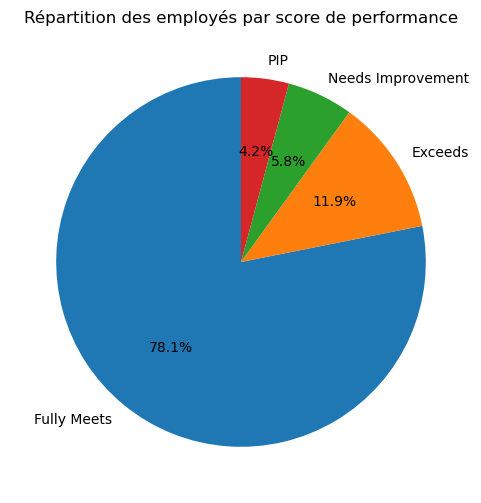

In [188]:
# Diagramme Circulaire de la variable 'Performance':

    # Vérification des modalités :
print(df_utile['PerformanceScore'].unique())
    # Création des fréquences selon le score :
score_count = df_utile['PerformanceScore'].value_counts()
score_count
    # Création du diagramme circulaire :
plt.figure(figsize = (6,6)) # Permet de modifier la taille de la figure
plt.pie(score_count, labels = score_count.index, autopct ='%1.1f%%', startangle = 90) # Sélection des fréquences, affichage des pourcentages 
# et commencer à 90°
plt.title('Répartition des employés par score de performance') # Rajout de titre
plt.show()

Cette première visualisation, qui est un diagramme circulaire permet de connaitre le pourcentage d'employé dans chaque modalité de score de performance. En effet on observe que l'entreprise estime que 12% de leur employé sont au dela des attentes de l'entrerpise en terme de performance mais aussi que presque 3/4 des employés ont un score de performance très élevé avec la modalité 'Fully Meets'. Cependant 4.2% ont besoin d'un plan d'amélioration à la performance, qui correspond au seuil le plus bas de l'entreprise dans la performance. Enfin presque 6% des employés ont des lacunes certaines dans plusieurs domaines qu'il faut corriger pour la suite.

Grâce à ce diagramme circulaire on peut donc facilement observer la répartition des employés par score de performance. En effet l'entreprise à un trés bon score de performance avec 90% des employé avec les score les plus élévé mais 10% eux n'ont pas de pleinement convaincu et pour la moitié d'entre eux pas du tout. Il faut donc s'appuyer sur cette première visualisation afin de répondre à la problématique de notre projet qui est de déterminer les facteurs d'améliorations du score de performance.

Nous allons maintenant nous intéresser à la note de satisfaction que les employés ont fournis au sujet de l'entreprise.

##### Variable 'EmpSatisfaction'

La variable 'EmpSatisfaction' est une variable qualitative ordinale représentant la note attribuée par chaque employé à l’entreprise, sur une échelle de 1 à 5, à l’issue d’un sondage récent. Afin de visualiser clairement la répartition des réponses, nous utilisons un diagramme en barres. L’axe des abscisses correspond aux différentes notes (de 1 à 5), tandis que l’axe des ordonnées indique la fréquence des employés ayant donné chaque note.te.

[5, 3, 4, 2, 1]
Categories (5, int64): [1, 2, 3, 4, 5]


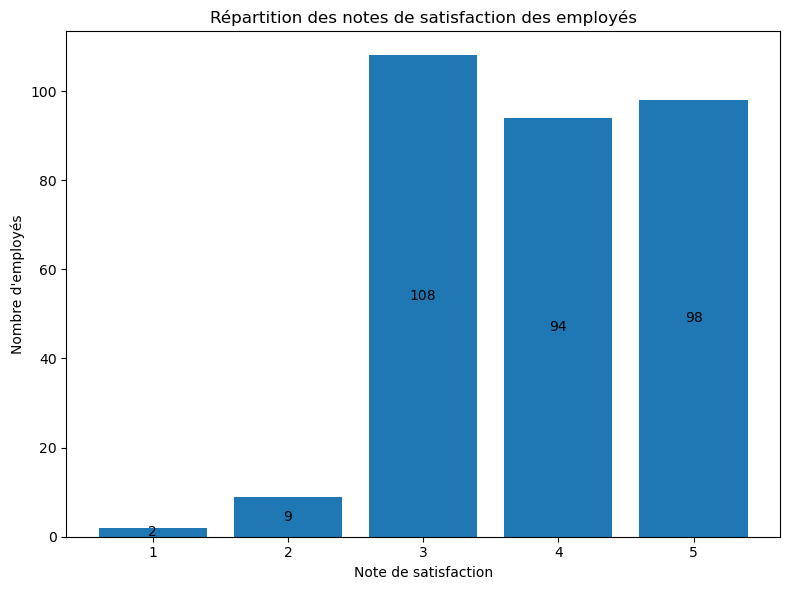

In [190]:
# Vérification des modalités :
print(df_utile['EmpSatisfaction'].unique())

# Création des fréquences selon le score de satisfaction de l'employé :
satisfaction_count = df_utile['EmpSatisfaction'].value_counts().sort_index()

# Création du diagramme en barres :
plt.figure(figsize=(8, 6))
bars = plt.bar(satisfaction_count.index.astype(str), satisfaction_count.values)
plt.title("Répartition des notes de satisfaction des employés")
plt.xlabel("Note de satisfaction")
plt.ylabel("Nombre d'employés")

# Ajout des étiquettes au centre des barres :
for bar in bars:
    height = bar.get_height() # Permet de récupérer la hauteur de chaque barre
    plt.text(bar.get_x() + bar.get_width() / 2, # .get_x() donne la position de la barre, bar.get_width() / 2 permet de centrer le texte
             height / 2, # Permet de placer l'étiquette au milieu de la barre.
             f'{int(height)}',
             ha = 'center', va = 'center', color = 'black', fontsize=10)

plt.tight_layout()
plt.show()

La répartition des notes de satisfaction montre que la majorité des employés évaluent leur expérience de travail de manière positive ou neutre, avec une concentration marquée sur les notes 3 (108 employés), 4 (94 employés) et 5 (98 employés). Très peu d’employés se déclarent insatisfaits (seulement 2 pour la note 1 et 9 pour la note 2), ce qui suggère un climat globalement favorable au sein de l’entreprise. La prédominance de la note 3 indique toutefois une marge de progression possible pour améliorer davantage la satisfaction des employés. 

Avec cette analyse, nous tenons peut-être notre premier levier d’action pour améliorer les performances des employés. En effet, une large proportion des salariés attribuent une note moyenne (3 sur 5), ce qui pourrait refléter un certain manque d’engagement ou d’enthousiasme. En identifiant les sources de cette satisfaction neutre que ce soit en termes de reconnaissance, de conditions de travail ou d’opportunités d’évolution l’entreprise pourrait mettre en place des actions ciblées pour faire progresser le bien-être des collaborateurs, ce qui aurait probablement un impact positif sur leur motivation et leur productivité.

On va maintenant analysé la variable 'EngagementSurvey'.

##### Variable 'EngagementSurvey'

Avant d'analyser la variable 'EngagementSurvey', nous allons préciser ce qu'elle représente. Cette variable est le résultat du dernier sondage d’engagement organisé par un partenaire externe à l’entreprise. Il s'agit d’une variable quantitative continue, dont les valeurs sont comprises entre 0 et 5.

Pour analyser cette variable, nous allons utiliser un histogramme, qui permettra de visualiser la distribution des scores d’engagement au sein de l’entreprise. Ce type de graphique est particulièrement adapté aux variables continues, car il met en évidence la densité des observations dans chaque intervalle de valeur, révélant ainsi des tendances générales, des asymétries éventuelles ou la présence de valeurs extrêmes.

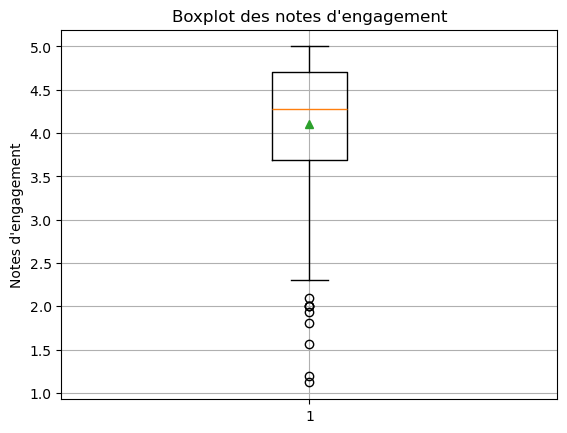

In [192]:
# Création du boxplot :
plt.boxplot(df_utile['EngagementSurvey'], showmeans = True)
    # Ajout de titres et labels :
plt.title("Boxplot des notes d'engagement")
plt.ylabel("Notes d'engagement")
plt.grid(True)
plt.show()

Ce boxplot permet de visualiser rapidement plusieurs indicateurs de dispersion tels que la médiane, le premier et le troisième quartile, ainsi que les éventuelles valeurs extrêmes situées au-delà de 1,5 fois l’écart interquartile (IQR). On remarque ici que la note moyenne (ici d'environ 4.3) est proche de la note médiane qui est de 4.4 environ, ce qui représente une certaine symétrie malgré les valeurs extrêmes que l'on peut retouver entre 1.0 et environ 2.3 qui, elles indiquent une hétérogénéité.

Avec ce boxplot on peut donc observer que les employés sont majoritairement engagés dans leur travail et dans l'entreprise, mais certains collaborateurs avec des notes très basse comme 1.0 indiquent un réel probléme d'engagement qui est peut etre du au nombre de projet ou bien un salaire plus bas que d'autres employé pour le même poste.

Cette variable peut etre un ds facteurs de performance mais également un point à approfondir comme axe d'amélioration pour intégrer les employés avec les notes les plus basses. On va maintenant regardé les distributions de chaque variables quantitatives.

##### Différentes distribution des variables quantitatives

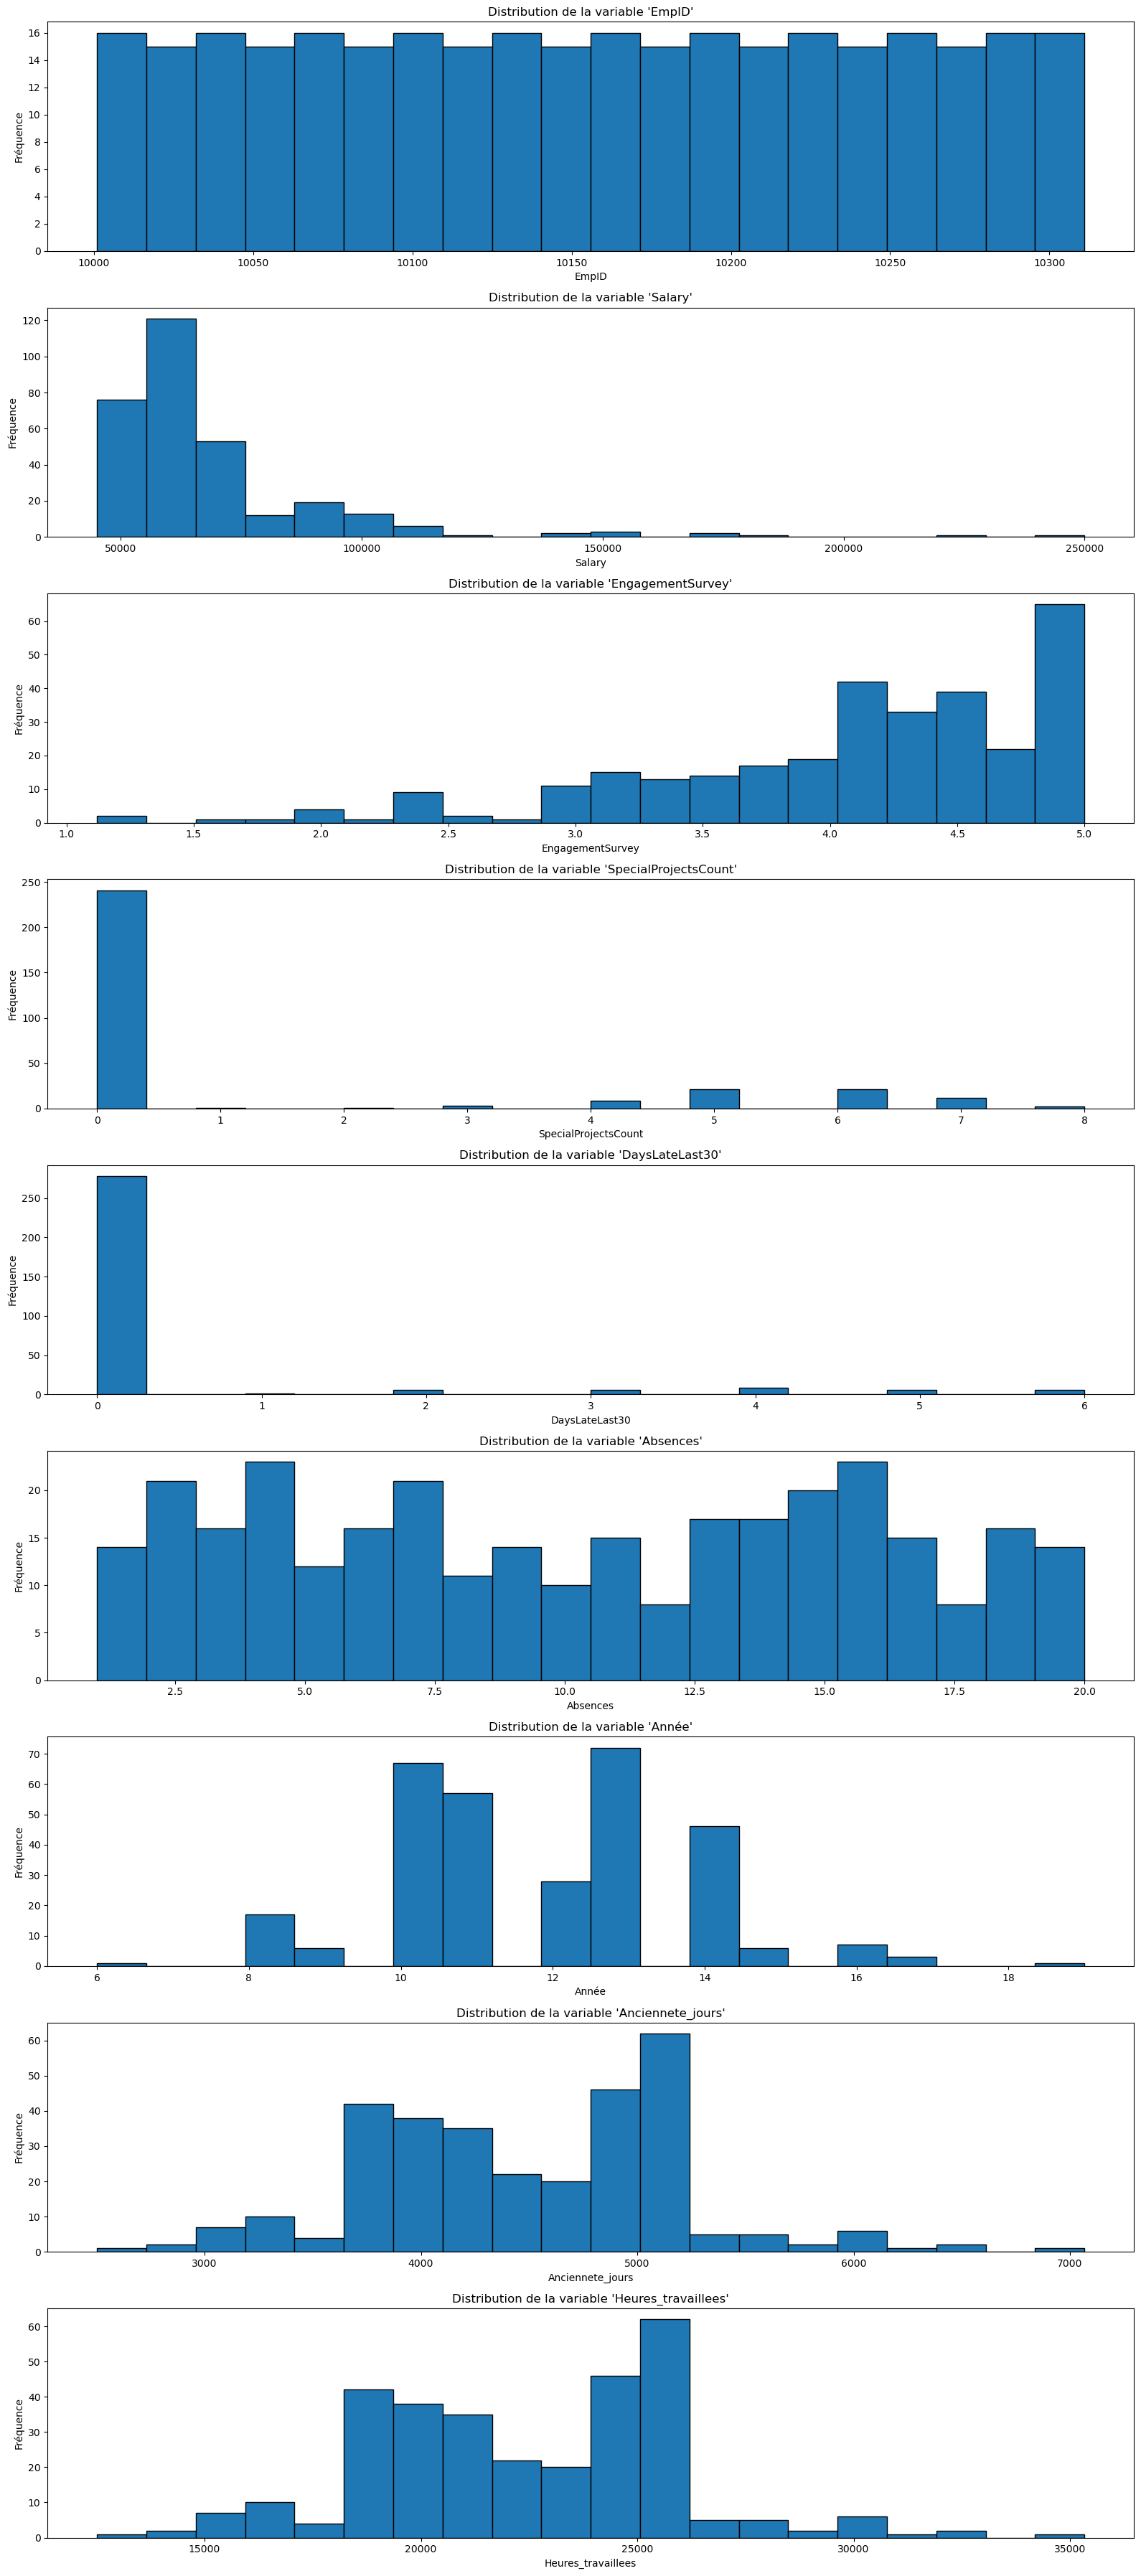

In [194]:
# Sélection automatique des colonnes quantitatives :
colonnes_quantitatives = df_utile.select_dtypes(include=['int64', 'float64']).columns

# Définir la taille du plot général :
plt.figure(figsize=(16, 4 * len(colonnes_quantitatives))) # Augmente la hauteur selon le nombre de variables

# Boucle sur chaque variable quantitatives pour faire un histogramme :
for i, col in enumerate(colonnes_quantitatives, 1): # Permet de parcourir les colonnes quantitatives sans spécifier la position de départ 
    #grâce au enumerate.
    plt.subplot(len(colonnes_quantitatives), 1, i) # Organise tous les histogramme sur une seule colonne
    plt.hist(df_utile[col],bins=20, edgecolor='black')
    plt.title(f"Distribution de la variable '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout() # Ajuste automatiquement les histogrammes en hauteur
plt.show()

Ce graphique présente les distributions individuelles de plusieurs variables numériques du jeu de données. On observe tout d’abord une forte asymétrie à droite pour la variable Salary, la majorité des employés gagnant entre 40 000 et 70 000, tandis que quelques cas isolés perçoivent des salaires nettement plus élevés. La variable EngagementSurvey suit une distribution relativement uniforme, bien que légèrement biaisée vers les scores élevés (4 à 5), ce qui suggère un bon niveau d’engagement global. En revanche, SpecialProjectsCount et DaysLateLast30 sont massivement concentrées autour de zéro, indiquant que la grande majorité des employés ne sont ni en retard ni impliqués dans des projets spéciaux. La variable Absences, quant à elle, est répartie entre 1 et 20 jours sans tendance apparente, traduisant une grande variabilité d’un employé à l’autre. Enfin, les heures travaillées sont principalement regroupées entre 1800 et 2700, ce qui suggère une population majoritairement composée de collaborateurs ayant une ancienneté moyenne, avec peu de très nouveaux ou très anciens employés. Ces observations permettent d’identifier des variables potentiellement peu discriminantes et d’orienter les prochaines étapes de l’analyse.

##### Distribution des variables qualitatives

La distribution des variables qualitatives à le même objectif que celles pour les variables quantitatives, c'est-à-dire faire ressortir les modalités les plus représentés dans le jeu de données.

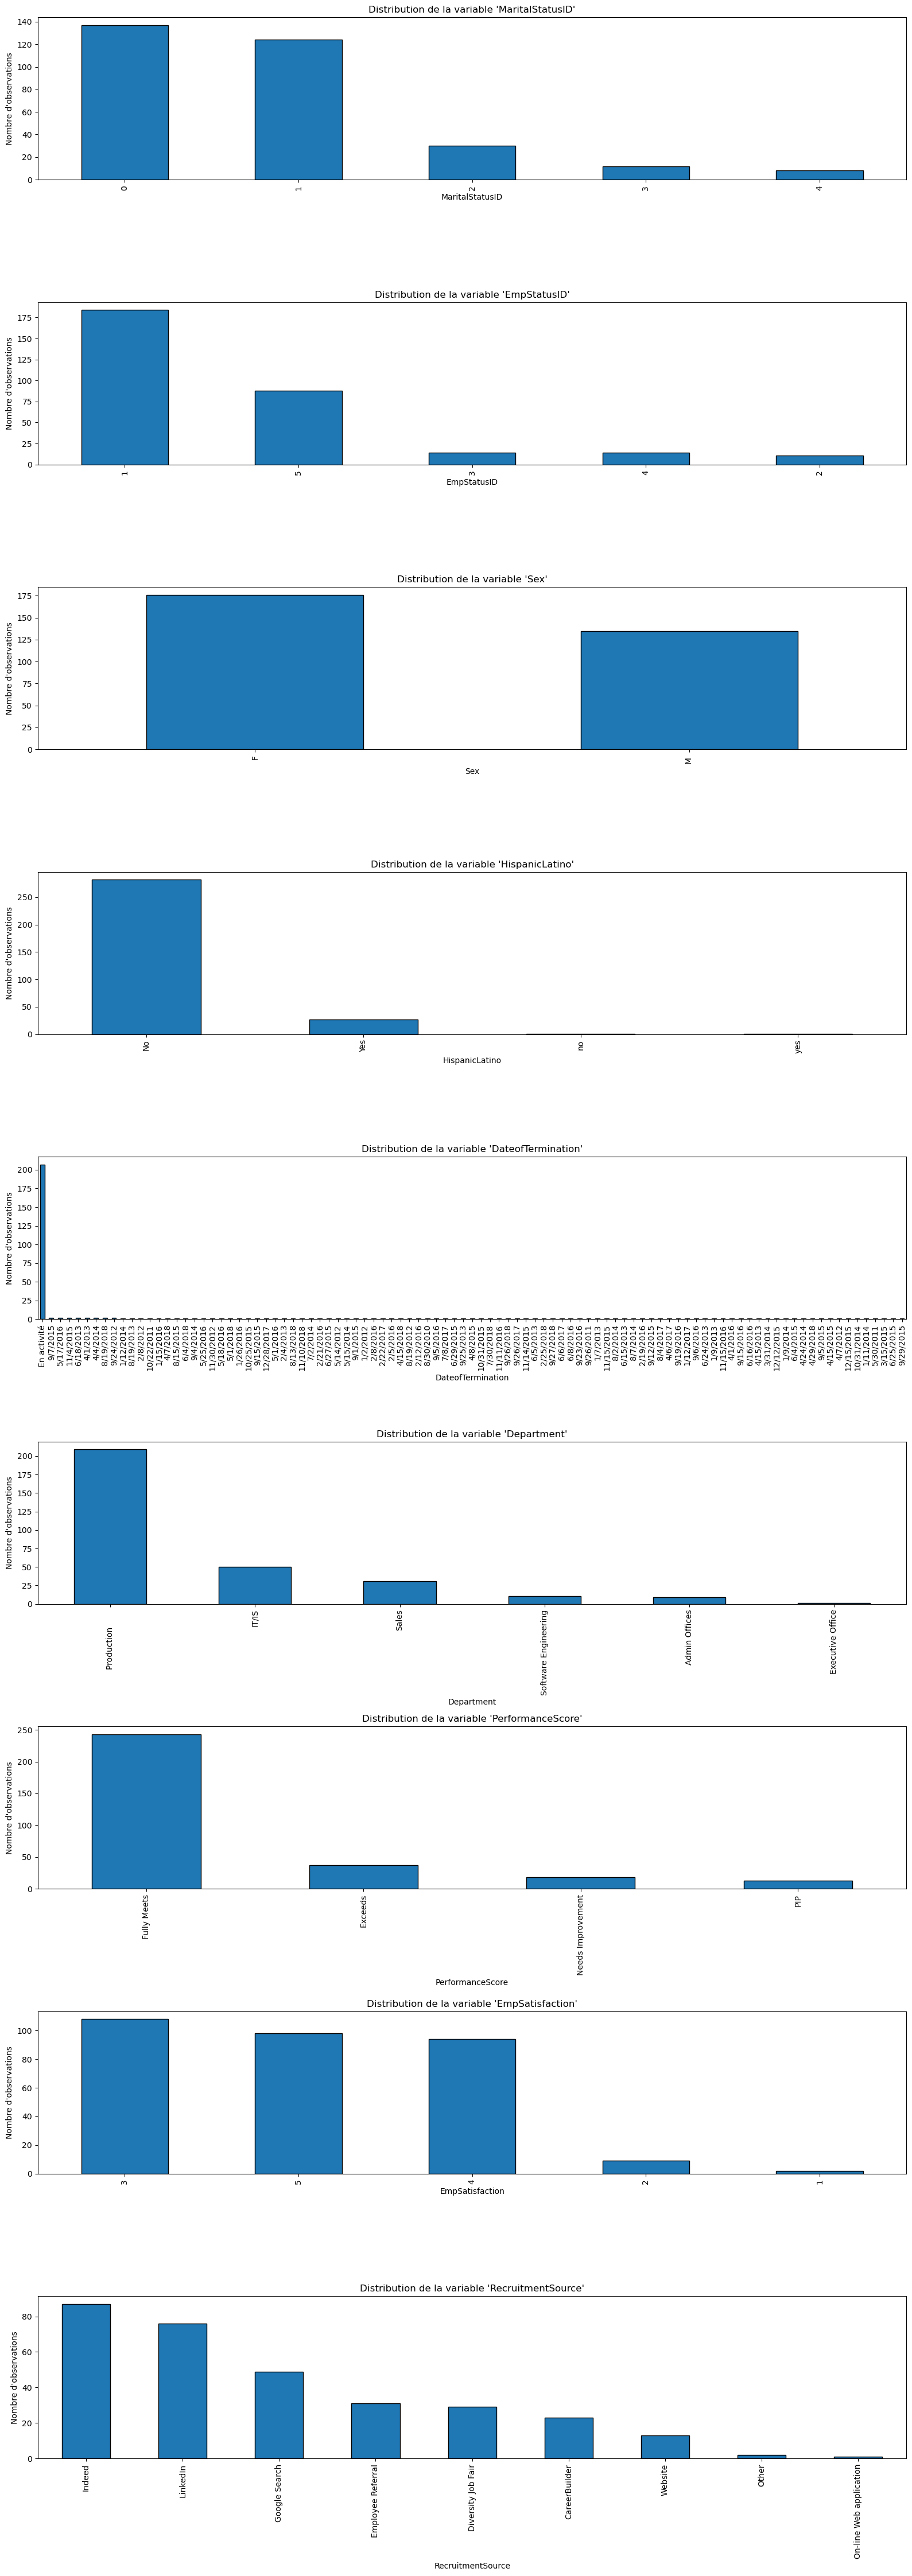

In [196]:
# Sélection des colonnes qualitatives :
colonnes_qualitatives = df_utile.select_dtypes(include = ['object', 'category']).columns

# Définir la taille globale de la figure :
plt.figure(figsize = (16, 5 * len(colonnes_qualitatives))) 

# Affichage des graphiques :
for i, col in enumerate(colonnes_qualitatives, 1):
    plt.subplot(len(colonnes_qualitatives), 1, i) 
    df_utile[col].value_counts().plot(kind='bar', edgecolor = 'black')
    plt.title(f"Distribution de la variable '{col}'")
    plt.ylabel("Nombre d'observations")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Analyse Bivariée

Cette partie va nous permettre de réellement voir les liens entre les variables pour déterminer ce qui influe sur la performance des employés et détecter des facteurs d'améliorations.

##### Matrice de dispersion

Cette matrice va nous permettre d'observer les relations entre chaque variables via un nuage de points et histogramme pour les relations entre la même variable.

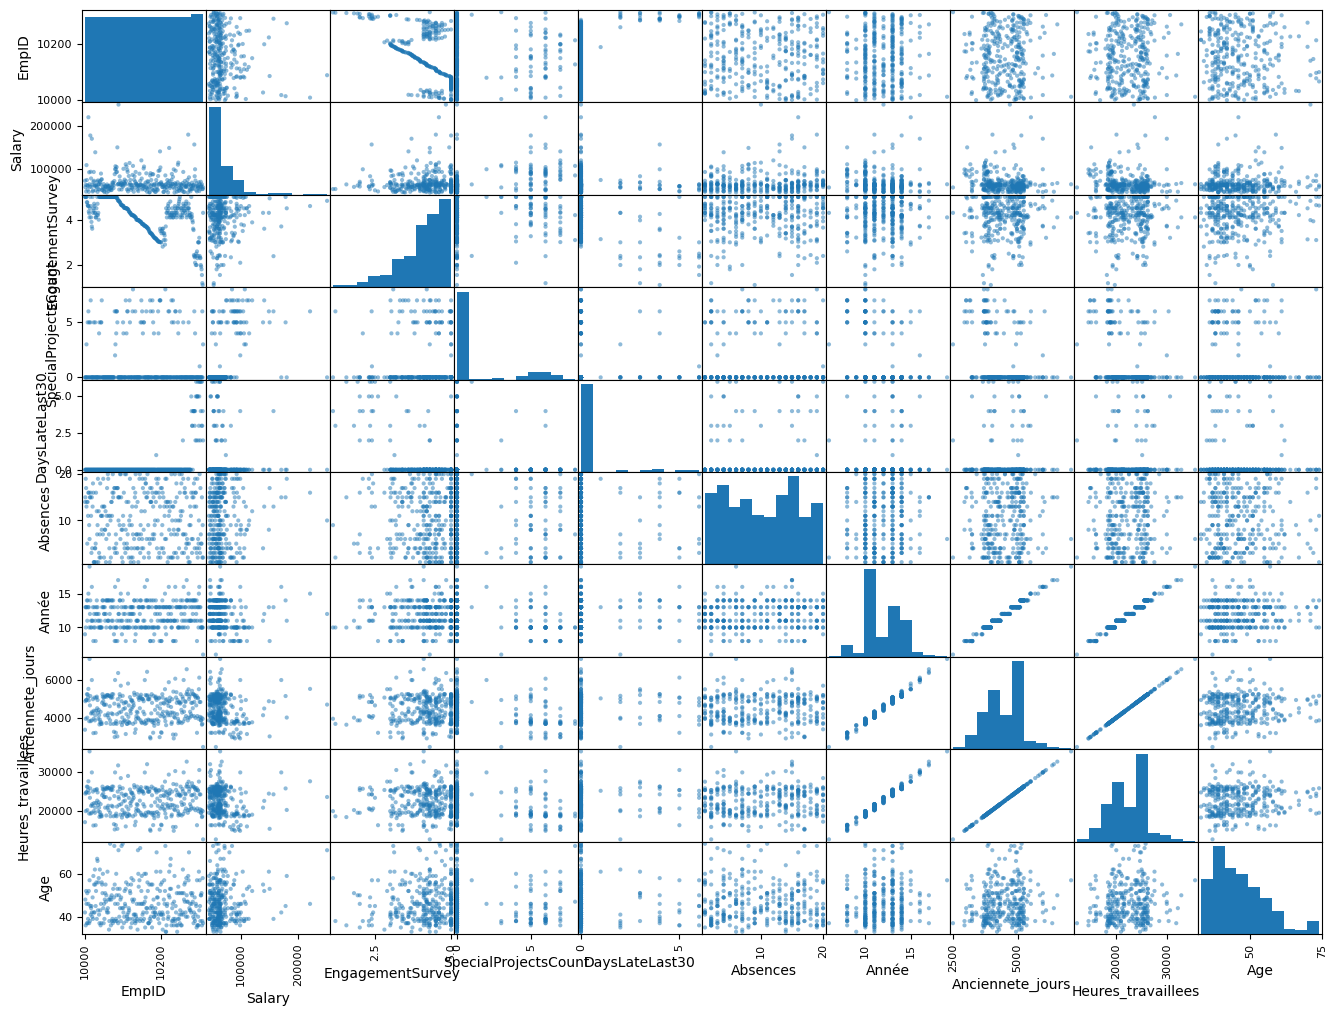

In [198]:
scatter_matrix(df_utile, figsize = (16, 12))
plt.show()

La matrice de dispersion présentée permet d'examiner les relations entre plusieurs variables numériques du jeu de données, telles que le salaire, l’engagement, les absences, l’ancienneté et les heures travaillées. On y observe une forte corrélation linéaire entre les variables Anciennete_jours et Heures_travaillees, ce qui est attendu puisque cette dernière en dépend directement. En revanche, les autres paires de variables ne montrent pas de relations évidentes : par exemple, Salary ne semble pas clairement corrélé ni à l’engagement, ni aux absences, ni aux projets spéciaux. La majorité des nuages de points sont très dispersés, ce qui suggère une faible relation linéaire. Les variables comme DaysLateLast30 ou SpecialProjectsCount montrent des distributions très concentrées sur quelques valeurs discrètes (souvent zéro), ce qui limite leur variabilité. Globalement, ce graphique confirme que peu de variables numériques présentent des relations fortes entre elles, à l’exception notable de celles liées directement au temps passé dans l’entreprise. On va donc maintenant réaliser une analyse moins générale pour trouver les possibles liens variables et donc des facteurs d'améliorations.

##### Liens avec les score de performances

Comme nous avons pu voir dans la partie Analyse Univariée, les score de performances reflétent une trés bonne tendance mais reste améliorable, nous allons donc déterminer le type d'employé avec des score faible afin de déterminer les facteurs d'améliorations. 

Le premier facteur d'un score de performance bas auquel on pense est le salaire, on va donc réaliser un boxplot mettant en relation ces deux variables afin de déterminer l'existence d'un lien ou non.

C:\Users\loris\AppData\Local\Temp\ipykernel_4052\2888952342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes_perf = df_utile.groupby('PerformanceScore')['Salary'].apply(list)


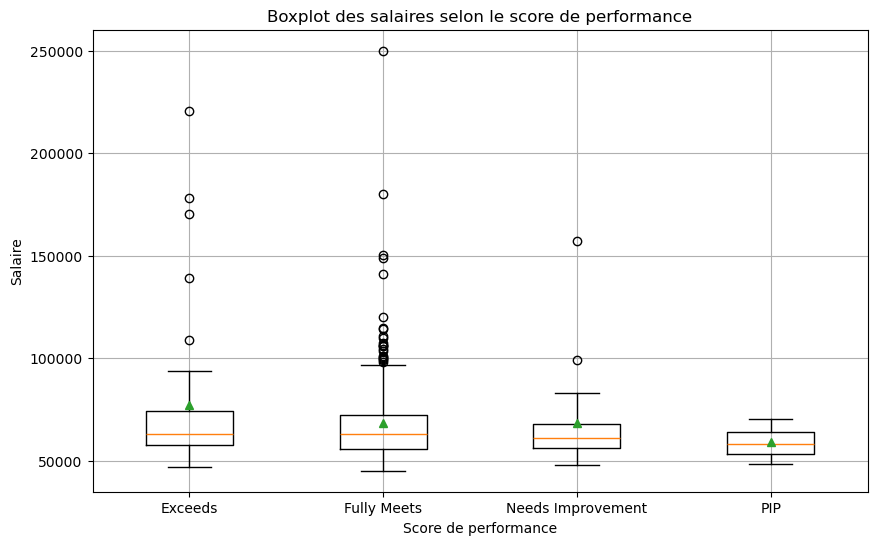

In [200]:
groupes_perf = df_utile.groupby('PerformanceScore')['Salary'].apply(list)

plt.figure(figsize = (10, 6))
plt.boxplot(groupes_perf, labels = groupes_perf.index, showmeans=True)
plt.title("Boxplot des salaires selon le score de performance")
plt.xlabel("Score de performance")
plt.ylabel("Salaire")
plt.grid(True)
plt.show()

Le boxplot révèle une corrélation positive entre le score de performance des employés et leur salaire, où la médiane salariale tend à diminuer progressivement de la catégorie "Exceeds" à "PIP". On observe une dispersion salariale plus importante au sein du groupe "Fully Meets", tandis que les groupes "Exceeds" et "PIP" présentent une plus grande homogénéité. La présence d'outliers, particulièrement dans les groupes "Exceeds" et "Fully Meets", suggère des cas de rémunérations exceptionnellement hautes ou basses qui pourraient nécessiter une investigation plus poussée. Dans le cadre d'un projet d'analyse des performances et des axes de progression, **ces données soulignent l'impact de la performance sur la rémunération et peuvent servir de point de référence pour motiver l'amélioration des employés moins performants**, tout en invitant à une analyse plus approfondie des disparités salariales au sein de chaque catégorie.

Le graphique suggère que l'entreprise récompense financièrement les employés ayant des performances supérieures et que les employés dont la performance nécessite une amélioration ou est sous un plan de progression sont généralement moins bien rémunérés.

Ces catégories peuvent également être utilisées pour identifier des groupes d'employés nécessitant des interventions spécifiques en termes de développement professionnel, de formation ou de soutien managérial. L'analyse de la répartition des employés dans ces différentes catégories peut également donner un aperçu de la santé globale de la performance au sein de l'organisation.

Nous avons donc identifié un premier facteur pouvant contribuer à l’amélioration du score de performance des employés. Poursuivons notre analyse avec la variable EngagementSurvey, car il semble logique qu’un employé peu investi dans son travail ait plus de difficulté à atteindre de bonnes performances. Bien que la matrice de dispersion n’indique pas de relation évidente entre ces deux variables, nous allons le vérifier rigoureusement en calculant le coefficient de corrélation de Spearman.

Ce test permet de mesurer la force et la direction d’une relation monotone entre deux variables. Il repose sur les hypothèses suivantes :

*Hypothèse nulle (H₀) :* il n’existe pas de corrélation monotone entre EngagementSurvey et PerformanceScore (p > 0.05).

*Hypothèse alternative (H₁) :* il existe une corrélation monotone entre ces deux variables (ρ < 0.05).

In [202]:
corr_spearman, p_value = spearmanr(df_utile['SpecialProjectsCount'], df_utile['EngagementSurvey'])

print(f"Coefficient de Spearman : {corr_spearman:.3f}")
print(f"Valeur p : {p_value:.4f}")

Coefficient de Spearman : 0.021
Valeur p : 0.7111


Le coefficient de Spearman obtenu est très proche de zéro (ρ = 0.021), ce qui indique une absence quasi totale de relation monotone entre les variables 'EngagementSurvey' et 'PerformanceScore'. De plus, la valeur p élevée (p = 0.7111) est bien supérieure au seuil classique de 0.05, ce qui nous empêche de rejeter l’hypothèse nulle. Autrement dit, aucune corrélation statistiquement significative n’a été mise en évidence entre l'engagement des employés et leur performance.

Ainsi, le nombre de projet n'influence pas l'engagement des employés. Nous allons regardé si il existe un lien avec le département. La variable 'Department' est une variable qualitative nominale composée de 6 départements différents :

*_Production_ :* Ce département est responsable de la fabrication ou de la livraison du produit ou service principal de l’entreprise. Il inclut souvent les ouvriers, techniciens ou opérateurs travaillant sur les lignes de production. C’est souvent un département avec une forte pression opérationnelle.

*_IT/IS_ :* Il s’agit du département informatique, en charge des infrastructures techniques, de la maintenance des systèmes d'information, du support technique et de la cybersécurité. Il assure aussi parfois le développement ou le paramétrage de logiciels internes.

*_Software Engineering_ :* Ce département regroupe les ingénieurs et développeurs logiciels. Ils conçoivent, développent, testent et maintiennent les applications logicielles utilisées en interne ou vendues aux clients. C’est un département souvent stratégique dans les entreprises technologiques.

*_Admin Offices_ :* Ce département couvre les fonctions administratives et de support comme la comptabilité, les ressources humaines, le juridique ou les services généraux. Il soutient les autres départements mais n'est pas directement impliqué dans la production de biens ou services.

*_Sales_ :* Le département des ventes est chargé de vendre les produits ou services de l’entreprise, de gérer les relations commerciales et d’atteindre les objectifs de chiffre d’affaires. Il interagit directement avec les clients.

*_Executive Office_ :* Ce département correspond aux cadres dirigeants (CEO, CFO, COO, etc.). Il regroupe les fonctions décisionnelles stratégiques. Les employés dans ce département ont généralement peu de diversité de tâches, mais une grande influence sur la direction de l’entreprise.

['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']
['Production' 'IT/IS' 'Software Engineering' 'Admin Offices' 'Sales'
 'Executive Office']


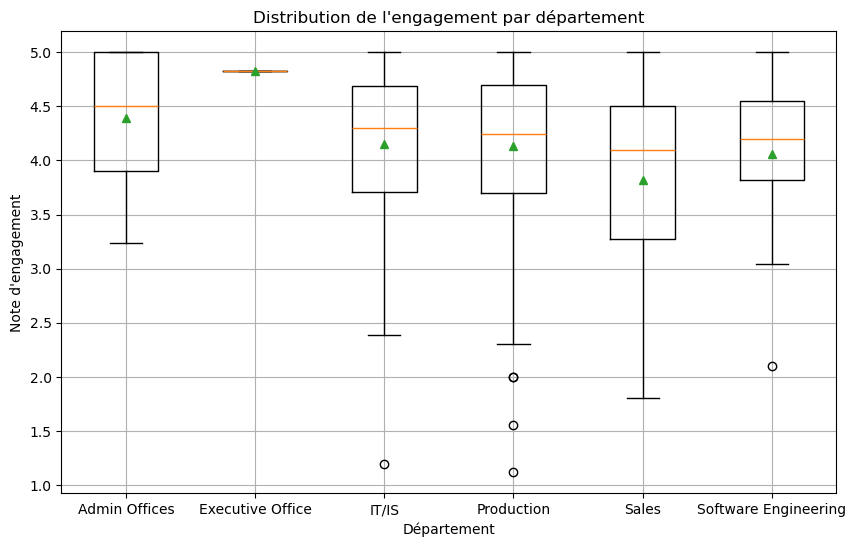

In [204]:
print(df_utile['Department'].unique())
df_utile['Department'] = df_utile['Department'].replace({'Production       ': 'Production'})
print(df_utile['Department'].unique())

groupes_depart = df_utile.groupby('Department')['EngagementSurvey'].apply(list)

plt.figure(figsize = (10, 6))
plt.boxplot(groupes_depart, labels = groupes_depart.index, showmeans = True)
plt.title("Distribution de l'engagement par département")
plt.xlabel("Département")
plt.ylabel("Note d'engagement")
plt.grid(True)
plt.show()

Le graphique en boîte ci-dessus illustre les différences de niveau d’engagement entre les départements de l’entreprise. On constate que le département Executive Office se démarque avec un engagement unanimement élevé et très homogène, ce qui peut refléter un fort alignement stratégique ou une petite taille d’équipe. À l’inverse, le département Sales affiche la plus grande variabilité et la médiane la plus basse en termes d’engagement, avec plusieurs cas de désengagement important, ce qui pourrait signaler un problème organisationnel ou managérial. Les autres départements, comme Production, IT/IS ou Software Engineering, présentent un engagement globalement correct mais avec quelques valeurs très faibles qui mériteraient une attention particulière. Cette analyse met en lumière des disparités internes importantes qu’il conviendrait d’explorer davantage pour cibler des actions d’amélioration adaptées par service.

Cette analyse de l’engagement par département s’inscrit directement dans l’objectif central de notre projet, qui vise à identifier les leviers d’amélioration de la performance des employés. L’engagement étant un facteur clé de la motivation, de la productivité et de la fidélisation, les écarts constatés entre départements offrent des pistes concrètes d’intervention. Par exemple, les résultats très positifs de l’Executive Office peuvent servir de référence pour comprendre les bonnes pratiques internes, tandis que les difficultés observées dans le département Sales suggèrent la nécessité d’enquêtes ciblées ou de politiques de soutien spécifiques.

Le deuxième facteurs d'amélioration réside dans les départements, on peut se donc demander si cela vient du manager ou de certains employé directement. Pour cela on va donc extraire les employés ayant des valeurs extremes pour ensuite croisé ces donnée avec les managers pour déterminer si il y en a en commun ce qui représentera un nouvel axe de progression pour l'entreprise.

In [206]:
# Ajout de la colonne 'ManagerName' à df_utile :
df_utile['ManagerName'] = df['ManagerName']

# Extraction des outliers avec la règle des 1.5*IQR :

    # Calculs des quartiles : 
Q1 = df_utile['EngagementSurvey'].quantile(0.25)
Q3 = df_utile['EngagementSurvey'].quantile(0.75)

    # Calcul de l'intervalle interquartile (IQR) :
IQR = Q3 - Q1

    # Calcul des bornes :
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

    # Extraction des outliers : 
outliers_engagement = df_utile[(df_utile['EngagementSurvey'] < borne_inf)] # Permet de créer un dataframe à partir de df_utile mais avec une condition

# Croisement des manager et de leur département:
manager_departments = df_utile[['ManagerName', 'Department']].drop_duplicates()

# Comptage des outliers par manager : 
outliers_par_manager = outliers_engagement['ManagerName'].value_counts()
outliers_par_manager

ManagerName
Amy Dunn           2
Lynn Daneault      2
Michael Albert     1
Kissy Sullivan     1
John Smith         1
Alex Sweetwater    1
Peter Monroe       1
Name: count, dtype: int64

On peut donc remarquer que deux manager se distinguent avec deux employés dans leur équipes qui ne sont pas impliqué dans leur travail. On va maintenant déterminer quels sont les départements les plus impacté.

In [208]:
# Extraction des managers identifiés comme ayant des outliers
managers_avec_outliers = outliers_par_manager.index

# Filtrage du DataFrame pour ne garder que ces managers
manager_departments_outliers = manager_departments[manager_departments['ManagerName'].isin(managers_avec_outliers)]

print(manager_departments_outliers.sort_values('ManagerName'))

        ManagerName            Department
6   Alex Sweetwater  Software Engineering
5          Amy Dunn            Production
32       John Smith                 Sales
2    Kissy Sullivan            Production
45    Lynn Daneault                 Sales
0    Michael Albert            Production
9      Peter Monroe                 IT/IS


On peut donc voir que le département le plus impacté est celui de la Production, suivis  de Sales, ce qui confirme notre relation entre le score d'engagement et le département. Une amélioration pour le futur serait de controler les méthodes des managers en plus de revalorisation salariale. On va maintenant regarder si l'age est un facteur dans l'engagement des employés. 

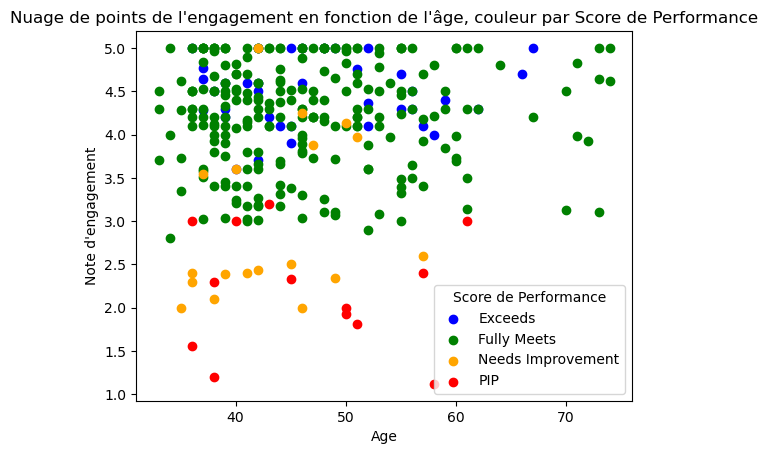

In [232]:
# Définition d'un mapping de couleurs pour chaque score de performance
performance_colors = {
    'PIP': 'red',
    'Needs Improvement': 'orange',
    'Fully Meets': 'green',
    'Exceeds': 'blue'
}

# Créer une nouvelle colonne pour les couleurs basées sur le score de performance
df_utile['PointColor'] = df_utile['PerformanceScore'].map(performance_colors)

# Créer le nuage de points avec la couleur spécifiée
for score in df_utile['PerformanceScore'].unique():
    subset = df_utile[df_utile['PerformanceScore'] == score]
    plt.scatter(subset['Age'], subset['EngagementSurvey'], color=subset['PointColor'].iloc[0], label=score, marker='o')

plt.title("Nuage de points de l'engagement en fonction de l'âge, couleur par Score de Performance")
plt.xlabel('Age')
plt.ylabel("Note d'engagement")
plt.legend(title = "Score de Performance")
plt.show()

Ce nuage de points enrichi par la couleur du score de performance suggère une faible corrélation positive entre l'engagement et la performance, mais n'indique pas de relation claire et directe entre l'âge et l'un ou l'autre de ces facteurs.

Maintenant que nous avons traité tous les scores de performances et en ayant trouvé deux facteurs d'améliorations on va passer à une analyse plus pousser sur les heures travaillées.

##### Lien avec les heures travaillées

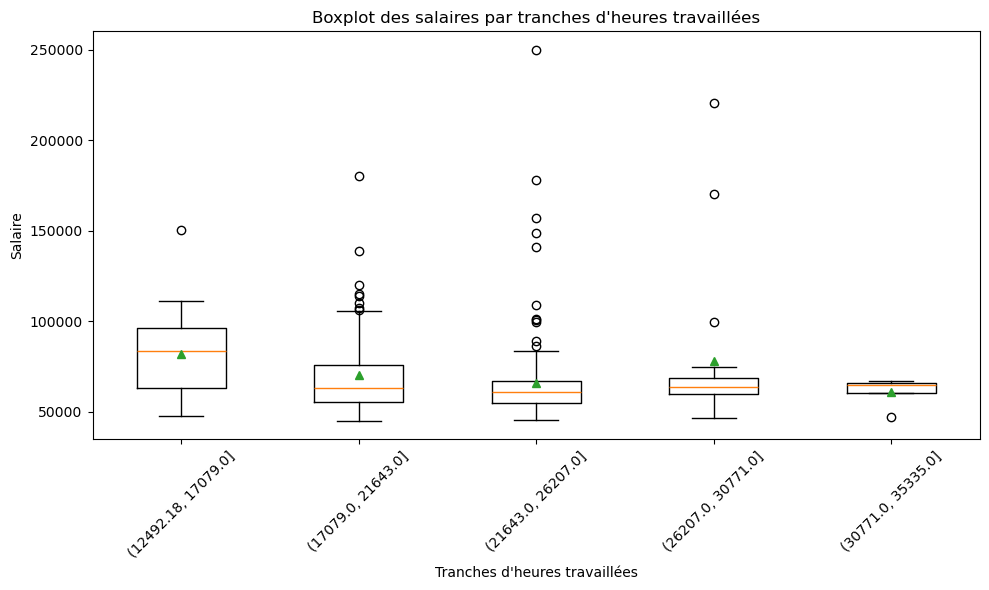

In [210]:
# Créer des tranches d'heures travaillées
df_utile['Heures_tranches'] = pd.cut(df_utile['Heures_travaillees'], bins=5)

# Grouper les salaires par tranche d'heures
groupes = df_utile.groupby('Heures_tranches', observed = True)['Salary'].apply(list)

# Créer le boxplot
plt.figure(figsize = (10, 6))
plt.boxplot(groupes, labels = groupes.index.astype(str), showmeans = True)
plt.title("Boxplot des salaires par tranches d'heures travaillées")
plt.xlabel("Tranches d'heures travaillées")
plt.ylabel("Salaire")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Cette visualisation met en évidence les variations de salaire en fonction des tranches d’heures travaillées, ce qui correspond indirectement à l’ancienneté des employés dans l’entreprise. Chaque boxplot représente une tranche spécifique d’heures cumulées.

On remarque que les employés ayant travaillé le moins d’heures, donc les plus récents dans l’entreprise, ont un salaire médian relativement élevé. Cela suggère une politique de recrutement avec des salaires attractifs dès l'embauche. À l’inverse, la tranche 21 608–26 172 heures, qui représente les employés avec le nombre d'heures moyens, affiche le salaire médian le plus bas ainsi que la plus forte présence de valeurs atypiques (outliers), environ dix. Enfin la tranche horraire la plus élevée c'est-à-dire 30746 - 35310 heures, qui représente les plus anciens employés, posséde le salaire moyen le plus faibles aucunes valeurs extrémeme supérieure au troisième quartile à part un mais qui est inférieur au premier quartile.

L’écart entre la médiane (ligne horizontale dans la boîte) et la moyenne (triangle vert) est particulièrement marqué dans ces tranches, indiquant que les outliers influencent significativement le salaire moyen. Cela souligne l’importance de ne pas se limiter à la moyenne pour analyser les salaires, surtout en présence de fortes disparités.

On peut donc en conclure que l'ancienneté n'influe pas le salaire.

## Conclusion

L’analyse des données RH menée dans ce projet a permis de mettre en lumière deux facteurs majeurs susceptibles d’influencer positivement la performance des employés. Le premier est la satisfaction des employés, mesurée par le score de satisfaction interne. Nous avons constaté une relation visuelle claire entre des scores élevés de satisfaction et des niveaux de performance accrus, ce qui suggère que le bien-être et la reconnaissance au travail jouent un rôle central dans l’investissement des collaborateurs. Le second facteur identifié concerne le niveau d’engagement, mesuré à travers le sondage externe "EngagementSurvey". Bien que globalement élevé, ce score présente quelques cas atypiques (outliers) que nous avons pu relier à des managers ou départements spécifiques, ouvrant ainsi la voie à des actions ciblées.

Ces deux axes *satisfaction et engagement* apparaissent donc comme des leviers prioritaires d’optimisation. En les surveillant attentivement et en menant des actions correctives dans les segments les plus à risque, l’entreprise peut espérer renforcer la motivation, l’implication et in fine la performance globale de ses collaborateurs.

## Exportation des données

Dans cette seconde phase du projet, je vais passer de l’analyse exploratoire en Python à la création d’un tableau de bord interactif sous Power BI. L’objectif est de rendre les résultats obtenus accessibles, lisibles et exploitables par des parties prenantes non techniques (RH, managers, direction).

Je vais commencer par importer les fichiers nettoyés et enrichis dans le notebook (comme df_utile, les outliers ou les résultats par manager), puis je vais concevoir des visualisations dynamiques dans Power BI. Ces visualisations mettront en avant les facteurs clés de performance identifiés (comme la satisfaction et l’engagement), tout en permettant une exploration des données par département, manager ou score.

L’enjeu est de transformer une analyse technique en outil d’aide à la décision clair et interactif.

In [241]:
df_utile.to_excel('df_utile.xlsx', index = False)
outliers_engagement.to_excel('outliers_engagement.xlsx', index = False)
outliers_par_manager.to_excel('outliers_par_manager.xlsx', index = False)